In [62]:
%matplotlib inline

In [63]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from patsy import dmatrices
from sklearn import metrics
from statsmodels.stats.outliers_influence import OLSInfluence
import seaborn as sns
import matplotlib.pyplot as plt

Użyj biblioteki statsmodels do wykonania regresji liniowej z mpg jako zmienną objaśnianą, a horsepower jako predyktorem (np. metoda OLS). Wyjaśnij informacje
zwracane przez metodę model.summary(), w szczególności: przedziały ufności, pvalues, T-statistic, F-statistic i R2
. Możesz się wzorować na tej analizie w Jupyter
notebook.

In [64]:
auto = pd.read_csv('Auto.csv')
auto['origin'] = auto['origin'].astype('category')
auto['horsepower'] = pd.to_numeric(auto['horsepower'], errors='coerce')
auto['weight'] = pd.to_numeric(auto['weight'], errors='coerce')

auto.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198.0,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220.0,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215.0,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225.0,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190.0,3850,8.5,70,1,amc ambassador dpl


In [65]:
# Look for null values
print(auto.isnull().sum())

# Drop rows with null values
auto = auto.dropna()

# verify that there are no null values
print(auto.isnull().sum())

mpg             0
cylinders       0
displacement    0
horsepower      5
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64
mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64


In [66]:
def myLinReg(model_formula, df, printMSE = False):
    """
    Function returns the summary for fitted linear model.
    
    Parameter "model_formula" should be a patsy formula describing the model.
    Parameter "df" is a dataframe.
    """
    
    # Split the data into training (80%) and validation set (20%)
    mask = np.random.rand(len(df)) < 0.8
    train = df[mask]
    valid = df[~mask]
        
    # Prepare the data (dmatrices is from patsy library)
    y_train, X_train = dmatrices(model_formula, data=train, return_type='dataframe')   
    y_valid, X_valid = dmatrices(model_formula, data=valid, return_type='dataframe')

    # Train the model
    model = sm.OLS(y_train, X_train) 
    result = model.fit() 

    
    

    if(printMSE==True):
        print(model_formula)

        # Show MSE for training set
        y_train_pred = result.predict(X_train)
        print(f'MSE_Train: {metrics.mean_squared_error(y_train, y_train_pred)}')

        # Show MSE for validation set
        y_valid_pred = result.predict(X_valid)
        print(f'MSE_Test: {metrics.mean_squared_error(y_valid, y_valid_pred)}\n')

    # Retrun fitted model summary
    return result

In [67]:
result = myLinReg('mpg ~ horsepower', auto)
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.603
Model:                            OLS   Adj. R-squared:                  0.602
Method:                 Least Squares   F-statistic:                     482.5
Date:                Thu, 07 Nov 2024   Prob (F-statistic):           1.02e-65
Time:                        09:45:43   Log-Likelihood:                -961.50
No. Observations:                 320   AIC:                             1927.
Df Residuals:                     318   BIC:                             1935.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     40.5420      0.811     50.002      0.000      38.947      42.137
horsepower    -0.1631      0.007    -21.967      0.000      -0.178      -0.149
==============================================================================
Omnibus:                       15.700   Durbin-Watson:                   1.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.592
Skew:                           0.537   Prob(JB):                     0.000249
Kurtosis:                       3.303   Cond. No.                         323.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Utwórz macierz wykresów punktowych (ang. scatterplot matrix), dla wszystkich
zmiennych w zbiorze danych. Możesz użyć pandas.plotting.scatter_matrix(...).
Oblicz macierz korelacji między zmiennymi. Możesz użyć funkcji corr() dla DataFrame z biblioteki pandas.

                   mpg  cylinders  displacement  horsepower    weight  \
mpg           1.000000  -0.777618     -0.805127   -0.778427 -0.832244   
cylinders    -0.777618   1.000000      0.950823    0.842983  0.897527   
displacement -0.805127   0.950823      1.000000    0.897257  0.932994   
horsepower   -0.778427   0.842983      0.897257    1.000000  0.864538   
weight       -0.832244   0.897527      0.932994    0.864538  1.000000   
acceleration  0.423329  -0.504683     -0.543800   -0.689196 -0.416839   
year          0.580541  -0.345647     -0.369855   -0.416361 -0.309120   
origin        0.565209  -0.568932     -0.614535   -0.455171 -0.585005   

              acceleration      year    origin  
mpg               0.423329  0.580541  0.565209  
cylinders        -0.504683 -0.345647 -0.568932  
displacement     -0.543800 -0.369855 -0.614535  
horsepower       -0.689196 -0.416361 -0.455171  
weight           -0.416839 -0.309120 -0.585005  
acceleration      1.000000  0.290316  0.212746  

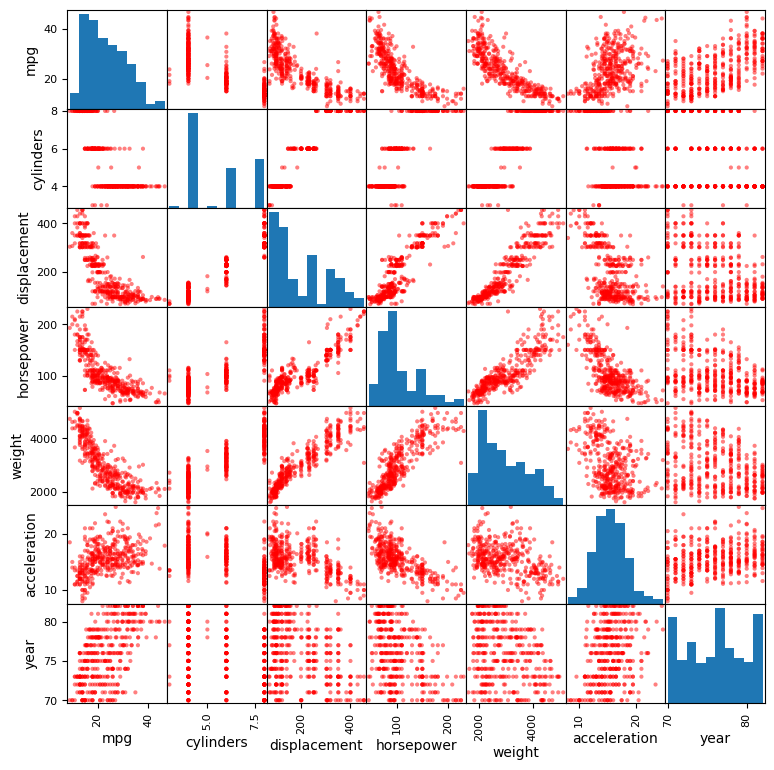

In [68]:
df_auto = auto[['mpg', 'cylinders', 'displacement', 'horsepower','weight','acceleration','year','origin']] 

print(df_auto.corr())
plt.close()
pd.plotting.scatter_matrix(auto,color="red",figsize=(9,9))
plt.show()

In [69]:
models = ['mpg ~ horsepower + weight + acceleration + year + displacement + cylinders + origin',
          'mpg ~ I(np.log(horsepower)) + weight + acceleration + year + displacement + cylinders + origin',
          'mpg ~ horsepower + I(np.sqrt(weight)) + acceleration + year + displacement + cylinders + origin',
          'mpg ~ horsepower * weight + acceleration + year + displacement + cylinders + origin',
          'mpg ~ horsepower * year + weight + acceleration + displacement + cylinders + origin',
          'mpg ~ horsepower * weight + I(np.log(acceleration)) + I(np.sqrt(displacement)) + cylinders + origin',]


Przeprowadź regresję liniową z mpg jako zmienną objaśnianą i wszystkimi innymi
zmiennymi (z wyjątkiem name) jako predyktorami. Spróbuj zdefiniować różne modele
wykorzystując biblioteką patsy i używając symboli +, *, : oraz różnych transformacji
zmiennych, takich jak na przykład I(np.log(X)) lub I(np.sqrt(X)). Co to jest błąd
generalizacji? Dla którego modelu uzyskujesz najlepszy błąd generalizacji?


In [70]:
result = myLinReg(models[0], auto, printMSE=True)
result.summary()

mpg ~ horsepower + weight + acceleration + year + displacement + cylinders + origin
MSE_Train: 10.895434855280886
MSE_Test: 10.285120201369688



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     175.2
Date:                Thu, 07 Nov 2024   Prob (F-statistic):          7.54e-109
Time:                        09:45:45   Log-Likelihood:                -815.29
No. Observations:                 312   AIC:                             1649.
Df Residuals:                     303   BIC:                             1682.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -16.4052      5.321     -3.083      0.002     -26.876      -5.934
origin[T.2]      2.8970      0.645      4.492      0.000       1.628       4.166
origin[T.3]      3.3833      0.617      5.484      0.000       2.169       4.597
horsepower      -0.0174      0.017     -1.053      0.293      -0.050       0.015
weight          -0.0074      0.001     -8.717      0.000      -0.009      -0.006
acceleration     0.1641      0.113      1.457      0.146      -0.058       0.386
year             0.7453      0.059     12.626      0.000       0.629       0.861
displacement     0.0318      0.009      3.495      0.001       0.014       0.050
cylinders       -0.5342      0.362     -1.475      0.141      -1.247       0.179
==============================================================================
Omnibus:                       22.005   Durbin-Watson:                   1.244
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.092
Skew:                           0.494   Prob(JB):                     1.07e-07
Kurtosis:                       4.222   Cond. No.                     8.70e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.7e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [71]:
result = myLinReg(models[1], auto, printMSE=True)
result.summary()

mpg ~ I(np.log(horsepower)) + weight + acceleration + year + displacement + cylinders + origin
MSE_Train: 8.864865327994991
MSE_Test: 14.971364543999323



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     216.6
Date:                Thu, 07 Nov 2024   Prob (F-statistic):          1.34e-123
Time:                        09:45:45   Log-Likelihood:                -818.26
No. Observations:                 326   AIC:                             1655.
Df Residuals:                     317   BIC:                             1689.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                23.7967      9.324      2.552      0.011       5.452      42.141
origin[T.2]               2.7684      0.557      4.966      0.000       1.672       3.865
origin[T.3]               2.4566      0.545      4.511      0.000       1.385       3.528
I(np.log(horsepower))    -9.3816      1.662     -5.644      0.000     -12.652      -6.111
weight                   -0.0046      0.001     -6.459      0.000      -0.006      -0.003
acceleration             -0.2940      0.109     -2.707      0.007      -0.508      -0.080
year                      0.7569      0.052     14.603      0.000       0.655       0.859
displacement              0.0194      0.007      2.607      0.010       0.005       0.034
cylinders                -0.2213      0.320     -0.692      0.490      -0.851       0.408
==============================================================================
Omnibus:                       10.890   Durbin-Watson:                   1.439
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               12.379
Skew:                           0.343   Prob(JB):                      0.00205
Kurtosis:                       3.665   Cond. No.                     1.76e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.76e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [72]:
result = myLinReg(models[2], auto, printMSE=True)
result.summary()
    

mpg ~ horsepower + I(np.sqrt(weight)) + acceleration + year + displacement + cylinders + origin
MSE_Train: 9.894541337557332
MSE_Test: 9.626916164696786



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     191.1
Date:                Thu, 07 Nov 2024   Prob (F-statistic):          2.28e-113
Time:                        09:45:45   Log-Likelihood:                -797.69
No. Observations:                 311   AIC:                             1613.
Df Residuals:                     302   BIC:                             1647.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -1.6908      4.983     -0.339      0.735     -11.496       8.115
origin[T.2]            2.6192      0.606      4.319      0.000       1.426       3.813
origin[T.3]            2.6679      0.623      4.281      0.000       1.442       3.894
horsepower            -0.0183      0.015     -1.258      0.209      -0.047       0.010
I(np.sqrt(weight))    -0.7661      0.076    -10.052      0.000      -0.916      -0.616
acceleration           0.0806      0.106      0.764      0.446      -0.127       0.288
year                   0.8342      0.057     14.718      0.000       0.723       0.946
displacement           0.0228      0.008      2.829      0.005       0.007       0.039
cylinders             -0.2931      0.353     -0.829      0.408      -0.989       0.402
==============================================================================
Omnibus:                       25.118   Durbin-Watson:                   1.342
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.558
Skew:                           0.506   Prob(JB):                     9.46e-10
Kurtosis:                       4.477   Cond. No.                     7.18e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.18e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [73]:
result = myLinReg(models[3], auto, printMSE=True)
result.summary()

mpg ~ horsepower * weight + acceleration + year + displacement + cylinders + origin
MSE_Train: 8.063377285368261
MSE_Test: 9.618742555848412



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     223.7
Date:                Thu, 07 Nov 2024   Prob (F-statistic):          1.15e-129
Time:                        09:45:45   Log-Likelihood:                -785.57
No. Observations:                 319   AIC:                             1591.
Df Residuals:                     309   BIC:                             1629.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.5123      4.983      0.103      0.918      -9.293      10.318
origin[T.2]           1.8480      0.568      3.254      0.001       0.730       2.965
origin[T.3]           1.9594      0.548      3.578      0.000       0.882       3.037
horsepower           -0.2157      0.026     -8.420      0.000      -0.266      -0.165
weight               -0.0110      0.001    -13.708      0.000      -0.013      -0.009
horsepower:weight  5.205e-05   5.71e-06      9.114      0.000    4.08e-05    6.33e-05
acceleration         -0.1250      0.095     -1.310      0.191      -0.313       0.063
year                  0.8008      0.051     15.785      0.000       0.701       0.901
displacement          0.0075      0.007      1.008      0.314      -0.007       0.022
cylinders            -0.0961      0.310     -0.310      0.757      -0.707       0.515
==============================================================================
Omnibus:                       19.615   Durbin-Watson:                   1.457
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.681
Skew:                           0.415   Prob(JB):                     2.18e-07
Kurtosis:                       4.272   Cond. No.                     1.26e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.26e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [74]:
result = myLinReg(models[4], auto, printMSE=True)
result.summary()

mpg ~ horsepower * year + weight + acceleration + displacement + cylinders + origin
MSE_Train: 9.24669375092754
MSE_Test: 8.262451774825331



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.3
Date:                Thu, 07 Nov 2024   Prob (F-statistic):          9.77e-116
Time:                        09:45:45   Log-Likelihood:                -774.51
No. Observations:                 306   AIC:                             1569.
Df Residuals:                     296   BIC:                             1606.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        -100.7458     11.823     -8.522      0.000    -124.013     -77.479
origin[T.2]         2.2748      0.609      3.735      0.000       1.076       3.473
origin[T.3]         1.8805      0.584      3.219      0.001       0.731       3.030
horsepower          0.8572      0.113      7.552      0.000       0.634       1.081
year                1.8973      0.155     12.238      0.000       1.592       2.202
horsepower:year    -0.0120      0.002     -7.704      0.000      -0.015      -0.009
weight             -0.0048      0.001     -6.621      0.000      -0.006      -0.003
acceleration       -0.1146      0.108     -1.060      0.290      -0.327       0.098
displacement       -0.0041      0.009     -0.476      0.634      -0.021       0.013
cylinders           0.1997      0.356      0.561      0.575      -0.501       0.900
==============================================================================
Omnibus:                       15.264   Durbin-Watson:                   1.350
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.355
Skew:                           0.395   Prob(JB):                     3.80e-05
Kurtosis:                       3.986   Cond. No.                     5.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [75]:
result = myLinReg(models[5], auto, printMSE=True)
result.summary()

mpg ~ horsepower * weight + I(np.log(acceleration)) + I(np.sqrt(displacement)) + cylinders + origin
MSE_Train: 15.010893089544153
MSE_Test: 13.95732512539225



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     115.3
Date:                Thu, 07 Nov 2024   Prob (F-statistic):           3.32e-88
Time:                        09:45:45   Log-Likelihood:                -884.69
No. Observations:                 319   AIC:                             1787.
Df Residuals:                     310   BIC:                             1821.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   66.8421      7.511      8.900      0.000      52.064      81.620
origin[T.2]                  0.8095      0.768      1.054      0.293      -0.702       2.321
origin[T.3]                  2.7353      0.800      3.417      0.001       1.160       4.310
horsepower                  -0.2596      0.035     -7.474      0.000      -0.328      -0.191
weight                      -0.0084      0.001     -7.066      0.000      -0.011      -0.006
horsepower:weight         4.827e-05   7.53e-06      6.411      0.000    3.35e-05    6.31e-05
I(np.log(acceleration))     -2.8601      2.187     -1.308      0.192      -7.162       1.442
I(np.sqrt(displacement))     0.0967      0.310      0.312      0.756      -0.514       0.707
cylinders                   -0.3329      0.434     -0.767      0.444      -1.187       0.522
==============================================================================
Omnibus:                       34.451   Durbin-Watson:                   0.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               54.133
Skew:                           0.678   Prob(JB):                     1.76e-12
Kurtosis:                       4.495   Cond. No.                     1.44e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.44e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

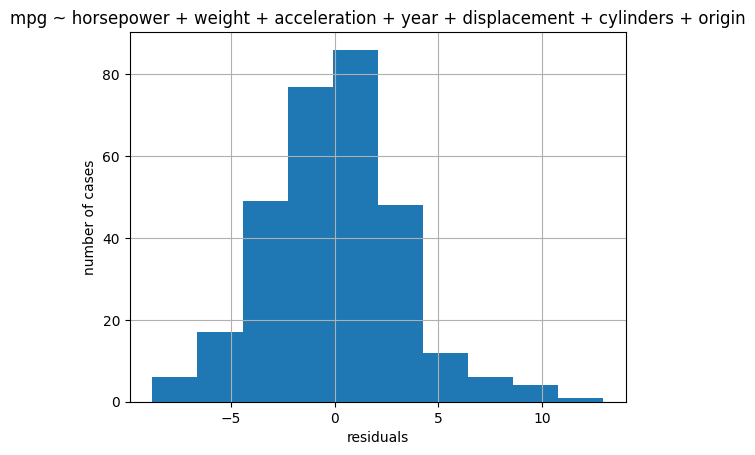

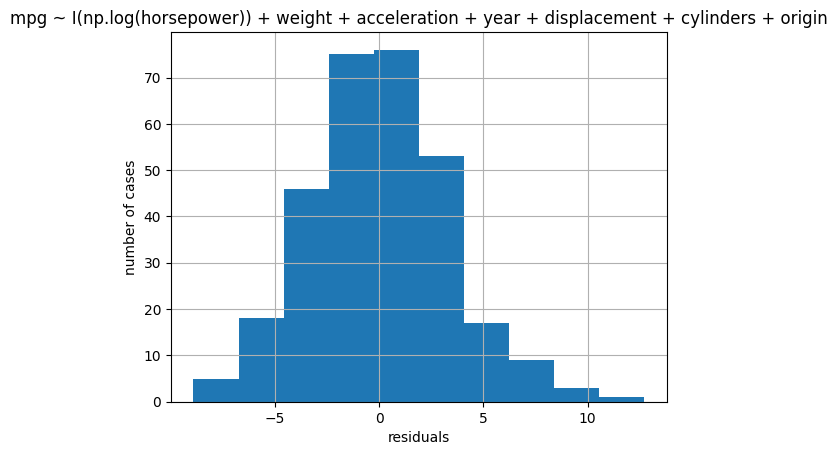

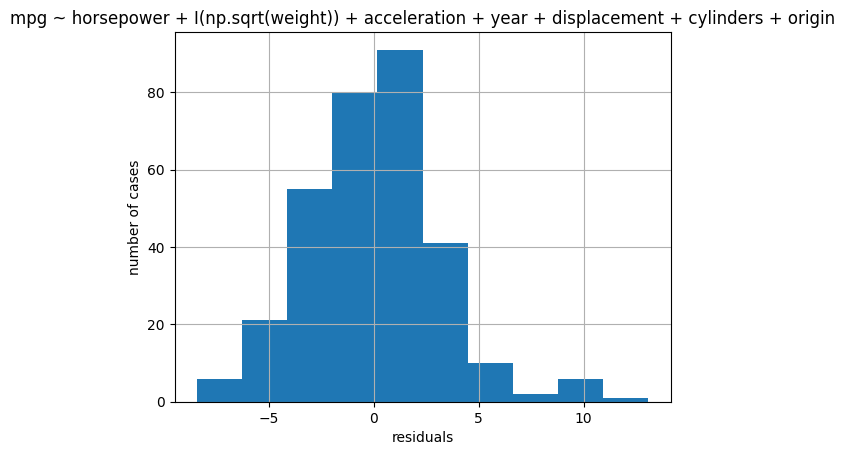

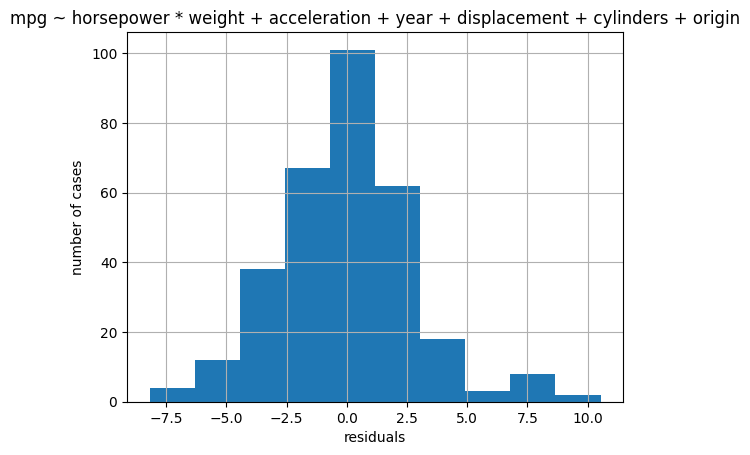

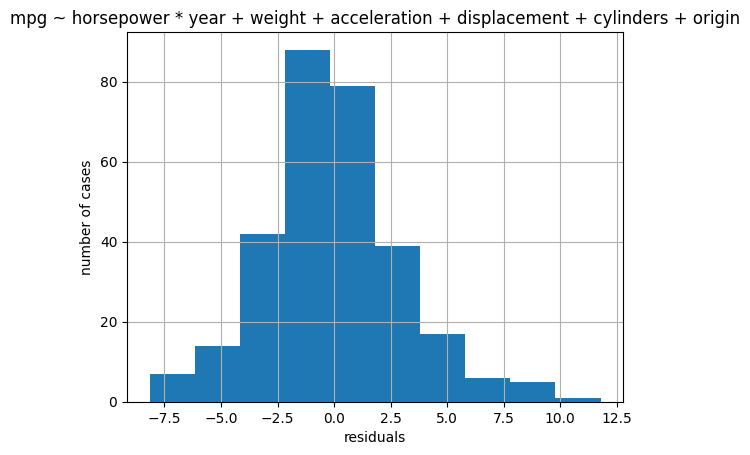

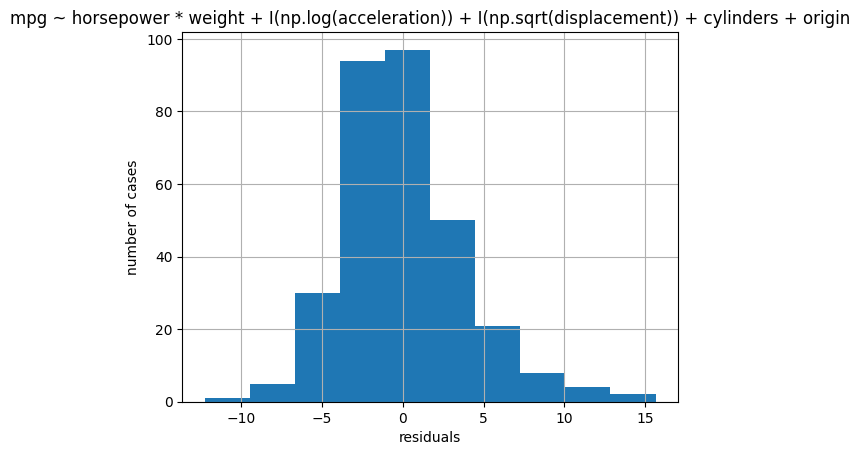

In [76]:
# Verify that residuals follow normal distribiution and look for outliers
plt.close()
for model in models:
    ax = myLinReg(model,auto).resid.hist()  
    ax.set_xlabel("residuals")
    ax.set_ylabel("number of cases")
    ax.set_title(model)
    plt.show()
    plt.close()





mpg ~ horsepower * weight + acceleration + year + displacement + cylinders + origin
MSE_Train: 8.51262676154881
MSE_Test: 7.690207069056529

13     0.932517
393    0.653143
326    0.563572
386    0.520488
333    0.469108
Name: Leverage, dtype: float64


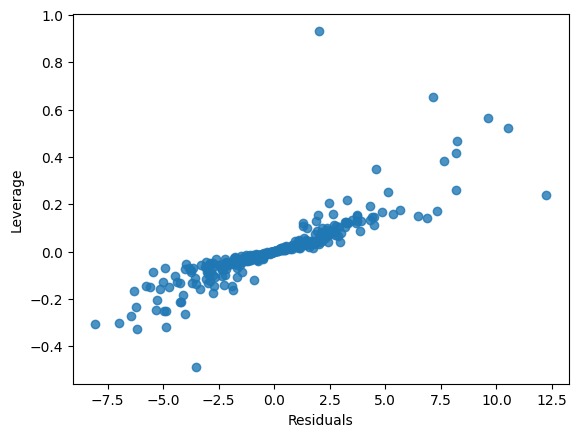

In [77]:
# Look for high leverage points that you might want to remove

result = myLinReg(models[3], auto, printMSE=True)
residuals = pd.Series(result.resid, name="Residuals")
leverage = pd.Series(OLSInfluence(result).influence, name = "Leverage")
_ = sns.regplot(x=residuals, y=leverage, fit_reg=False)

print(leverage.sort_values(ascending=False).head())
plt.show()
plt.close()

In [78]:
# Remove 3 point with highest leverage

indexs = leverage.sort_values(ascending=False).head(3).index

print(indexs)
print(auto.loc[indexs])

auto_droped = auto.drop(indexs)

result = myLinReg(models[3], auto_droped, printMSE=True)


Index([13, 393, 326], dtype='int64')
      mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
13   14.0          8         455.0       225.0    3086          10.0    70   
393  44.0          4          97.0        52.0    2130          24.6    82   
326  43.4          4          90.0        48.0    2335          23.7    80   

    origin                     name  
13       1  buick estate wagon (sw)  
393      2                vw pickup  
326      2       vw dasher (diesel)  
mpg ~ horsepower * weight + acceleration + year + displacement + cylinders + origin
MSE_Train: 8.45806629525163
MSE_Test: 6.17700608929954

